<a href="https://colab.research.google.com/github/Junaidahmed2319/datascience/blob/main/RealEstateData080725.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Real estate.csv')
(df.head())

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.drop('No',axis=1,inplace=True)

In [ ]:
df.columns = ['TransactionDate', 'HouseAge', 'DistancetoMRT', 'NumberofStores', 'Latitude', 'Longitude', 'HousePricePerUnit' ]
df.head()

,TransactionDate,HouseAge,DistancetoMRT,NumberofStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
'''
DOG
Attributes: #object perform
4 limbs
1 tail
2 eyes

Methods: #object action perform
bark()
eat(food)
run()

'''

'\nDOG\nAttributes: #object perform\n4 limbs\n1 tail\n2 eyes\n\nMethods: #object action perform\nbark()\neat(food)\nrun()\n\n'

In [ ]:
#are there any monthly seasonal patterns in the house price
df['TransactionMonth'] = df['TransactionDate'].astype(str).str.split('.').str[1].astype(int)

In [ ]:
df.head()

,TransactionDate,HouseAge,DistancetoMRT,NumberofStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,833


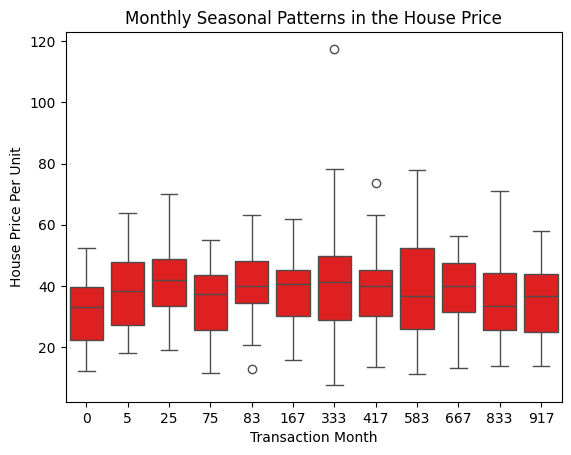

In [ ]:
sns.boxplot(data=df,x='TransactionMonth',y='HousePricePerUnit', color='Red')
plt.title('Monthly Seasonal Patterns in the House Price')
plt.xlabel('Transaction Month')
plt.ylabel('House Price Per Unit')
plt.show()

In [ ]:
monthly_avg = df.groupby ('TransactionMonth')['HousePricePerUnit'].mean()
print("Avg house price per month is", monthly_avg)

Avg house price per month is TransactionMonth
0      31.057143
5      38.119149
25     41.293750
75     35.581481
83     40.493478
167    38.304000
333    41.562069
417    38.453448
583    39.604348
667    38.543333
833    35.683871
917    35.557895
Name: HousePricePerUnit, dtype: float64


In [ ]:
#working with actual month names
#Step 1 = covert fractional year to datetime
#timedelta = have information about how many days in years or leap year also

import datetime
def fractional_year_to_datetime(fractional_year):
    year = int(fractional_year)
    decimal_year = fractional_year - year
    start_of_year = datetime.datetime(year, 1, 1)
    result_datetime = start_of_year + datetime.timedelta(days=decimal_year * 365.25)
    return result_datetime

df ['TransactionDateTime'] = df['TransactionDate'].apply(fractional_year_to_datetime)
df['TransactionMonthName'] = df['TransactionDateTime'].dt.strftime('%B')
df['TransactionMonth'] = df['TransactionDateTime'].dt.month
df.head()

,TransactionDate,HouseAge,DistancetoMRT,NumberofStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth,TransactionDateTime,TransactionMonthName
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012-11-30 22:25:19.199997,November
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012-11-30 22:25:19.199997,November
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,8,2013-08-01 22:34:40.800003,August
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,7,2013-07-02 15:00:00.000000,July
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012-10-31 06:04:40.800003,October


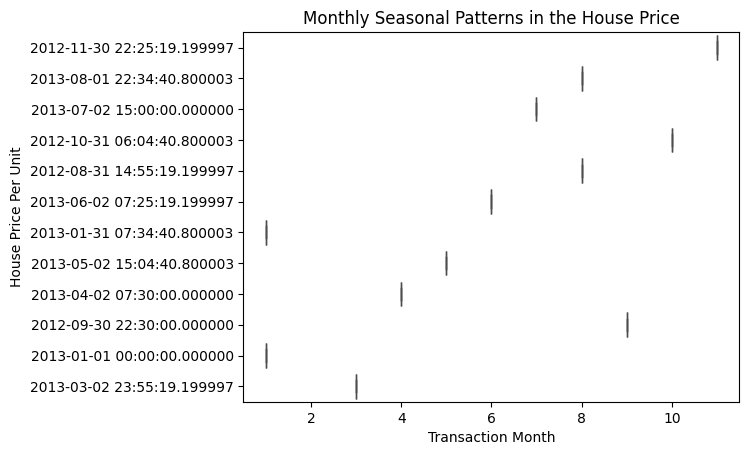

In [ ]:
sns.boxplot(data=df,x='TransactionMonth',y='TransactionDateTime', color='Red')
plt.title('Monthly Seasonal Patterns in the House Price')
plt.xlabel('Transaction Month')
plt.ylabel('House Price Per Unit')
plt.show()

In [ ]:
monthly_avg = df.groupby ('TransactionMonthName')['HousePricePerUnit'].mean()
print(monthly_avg)

TransactionMonthName
April        41.293750
August       39.003774
January      36.922973
July         38.119149
June         38.453448
March        38.304000
May          41.562069
November     35.557895
October      35.683871
September    35.581481
Name: HousePricePerUnit, dtype: float64


ASSIGNMENT 8 JULY

In [ ]:
#1 soughted month
#2 box plot with month names

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg = monthly_avg.reindex(month_order)
print(monthly_avg)

TransactionMonthName
January      36.922973
February           NaN
March        38.304000
April        41.293750
May          41.562069
June         38.453448
July         38.119149
August       39.003774
September    35.581481
October      35.683871
November     35.557895
December           NaN
Name: HousePricePerUnit, dtype: float64


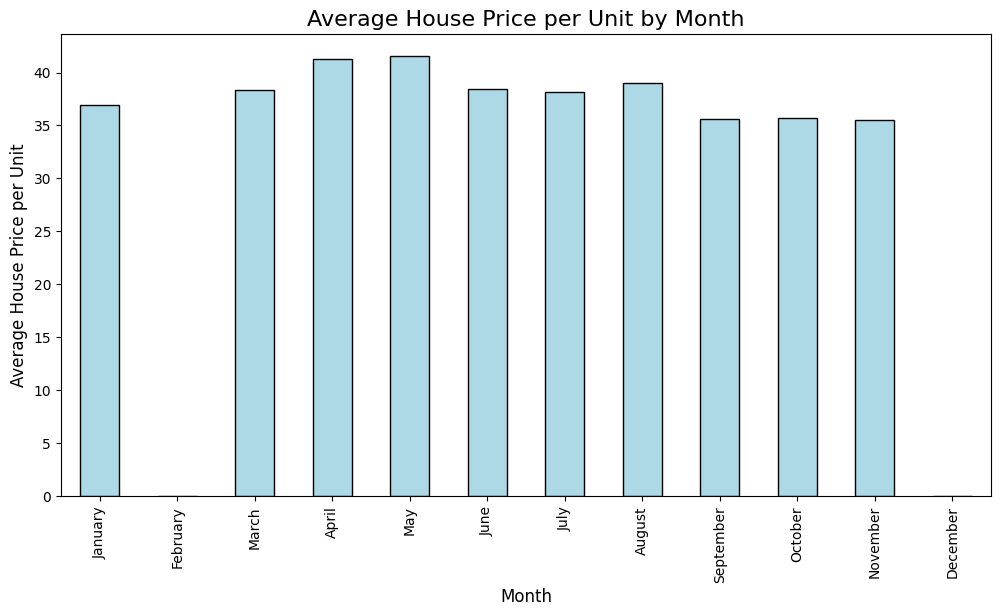

In [ ]:

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='lightblue', edgecolor='black')


plt.title('Average House Price per Unit by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average House Price per Unit', fontsize=12)
plt.show()